In [35]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
path = "/home/robson/PycharmProjects/ds-py2/data"
os.chdir(path)

In [37]:
movies = pd.read_csv("movielens/movies.csv")
links = pd.read_csv("movielens/links.csv")
rating = pd.read_csv("movielens/ratings.csv")
tags = pd.read_csv("movielens/tags.csv")

In [38]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(rating['timestamp'], unit = "s")
    data['Day'] = data.Date.dt.day
    data['Month'] = data.Date.dt.month
    data['Year'] = data.Date.dt.year
    data['Hour'] = data.Date.dt.hour
    data['Minutes'] = data.Date.dt.minute
    data['Weekday'] = data['Date'].dt.day_name()
    data.loc[data.Month <= 6, "Semester"] = 1
    data.loc[data.Month > 6, "Semester"] = 2
    data = data.drop(['timestamp'], axis = 1)
    return data


In [39]:
rating.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [40]:
rating_filtered = feature_engineering(rating)
rating_filtered.head()

userId  movieId  rating                Date  Day  Month  Year  Hour  \
0       1        1     4.0 2000-07-30 18:45:03   30      7  2000    18   
1       1        3     4.0 2000-07-30 18:20:47   30      7  2000    18   
2       1        6     4.0 2000-07-30 18:37:04   30      7  2000    18   
3       1       47     5.0 2000-07-30 19:03:35   30      7  2000    19   
4       1       50     5.0 2000-07-30 18:48:51   30      7  2000    18   

   Minutes Weekday  Semester  
0       45  Sunday       2.0  
1       20  Sunday       2.0  
2       37  Sunday       2.0  
3        3  Sunday       2.0  
4       48  Sunday       2.0

In [41]:
tags_filtered = feature_engineering(tags)
tags_filtered.head()

userId  movieId              tag                Date  Day  Month  Year  \
0       2    60756            funny 2000-07-30 18:45:03   30      7  2000   
1       2    60756  Highly quotable 2000-07-30 18:20:47   30      7  2000   
2       2    60756     will ferrell 2000-07-30 18:37:04   30      7  2000   
3       2    89774     Boxing story 2000-07-30 19:03:35   30      7  2000   
4       2    89774              MMA 2000-07-30 18:48:51   30      7  2000   

   Hour  Minutes Weekday  Semester  
0    18       45  Sunday       2.0  
1    18       20  Sunday       2.0  
2    18       37  Sunday       2.0  
3    19        3  Sunday       2.0  
4    18       48  Sunday       2.0

## Merge

In [42]:
df = pd.merge(pd.merge(pd.merge(rating_filtered, links, on = 'movieId'),
                       movies, on = 'movieId'), tags_filtered, on = ['userId','movieId'])
df.head()

userId  movieId  rating              Date_x  Day_x  Month_x  Year_x  \
0     336        1     4.0 2005-07-24 17:48:49     24        7    2005   
1     474        1     4.0 2001-01-04 02:36:00      4        1    2001   
2     567        1     3.5 2018-05-02 18:33:21      2        5    2018   
3     289        3     2.5 2006-03-27 01:57:37     27        3    2006   
4     289        3     2.5 2006-03-27 01:57:37     27        3    2006   

   Hour_x  Minutes_x  Weekday_x  ...  \
0      17         48     Sunday  ...   
1       2         36   Thursday  ...   
2      18         33  Wednesday  ...   
3       1         57     Monday  ...   
4       1         57     Monday  ...   

                                        genres    tag              Date_y  \
0  Adventure|Animation|Children|Comedy|Fantasy  pixar 1996-10-17 12:30:02   
1  Adventure|Animation|Children|Comedy|Fantasy  pixar 2005-01-26 22:47:05   
2  Adventure|Animation|Children|Comedy|Fantasy    fun 2000-08-08 02:57:05   
3                               Comedy|Romance  moldy 1996-10-17 12:11:36   
4                               Comedy|Romance    old 1996-10-17 12:12:29   

  Day_y Month_y Year_y Hour_y  Minutes_y  Weekday_y  Semester_y  
0    17      10   1996     12         30   Thursday         2.0  
1    26       1   2005     22         47  Wednesday         1.0  
2     8       8   2000      2         57    Tuesday         2.0  
3    17      10   1996     12         11   Thursday         2.0  
4    17      10   1996     12         12   Thursday         2.0  

[5 rows x 24 columns]

In [43]:
df.columns

Index(['userId', 'movieId', 'rating', 'Date_x', 'Day_x', 'Month_x', 'Year_x',
       'Hour_x', 'Minutes_x', 'Weekday_x', 'Semester_x', 'imdbId', 'tmdbId',
       'title', 'genres', 'tag', 'Date_y', 'Day_y', 'Month_y', 'Year_y',
       'Hour_y', 'Minutes_y', 'Weekday_y', 'Semester_y'],
      dtype='object')

### Gerar colunas de gêneros

In [44]:
df[['Genre_1','Genre_2','Genre_3','Genre_4','Genre_5','Genre_6','Genre_7']] = df["genres"].str.split("|", n = 6, expand = True) 

### One Hot Encoder

In [45]:
genero_bruto = pd.concat([df.Genre_1, df.Genre_2, df.Genre_3, df.Genre_4, df.Genre_5, df.Genre_6, df.Genre_7])


genero = []

for i in genero_bruto.unique():
    genero.append(i)

# onehotencoder

def dummy_genero(data):
    for i in genero:
        data.loc[(df.Genre_1 == i) | (df.Genre_2 == i) | (df.Genre_3 == i)| 
                 (df.Genre_4 == i)| (df.Genre_5 == i) | (df.Genre_6 == i) | (df.Genre_7),i] = 1
    data.fillna(0, inplace = True)
    data = data.drop(genero, axis = 1)
    
df2 = df.copy()
dummy_genero(df2)
df2.head()

userId  movieId  rating              Date_x  Day_x  Month_x  Year_x  \
0     336        1     4.0 2005-07-24 17:48:49     24        7    2005   
1     474        1     4.0 2001-01-04 02:36:00      4        1    2001   
2     567        1     3.5 2018-05-02 18:33:21      2        5    2018   
3     289        3     2.5 2006-03-27 01:57:37     27        3    2006   
4     289        3     2.5 2006-03-27 01:57:37     27        3    2006   

   Hour_x  Minutes_x  Weekday_x  ...  Sci-Fi  Film-Noir  Western Fantasy  \
0      17         48     Sunday  ...     0.0        0.0      0.0     1.0   
1       2         36   Thursday  ...     0.0        0.0      0.0     1.0   
2      18         33  Wednesday  ...     0.0        0.0      0.0     1.0   
3       1         57     Monday  ...     0.0        0.0      0.0     0.0   
4       1         57     Monday  ...     0.0        0.0      0.0     0.0   

  Musical Romance (no genres listed)  NaN  War  IMAX  
0     0.0     0.0                0.0  0.0  0.0   0.0  
1     0.0     0.0                0.0  0.0  0.0   0.0  
2     0.0     0.0                0.0  0.0  0.0   0.0  
3     0.0     1.0                0.0  0.0  0.0   0.0  
4     0.0     1.0                0.0  0.0  0.0   0.0  

[5 rows x 52 columns]

## Visualizações

In [46]:
data = (df.Day_x.value_counts().reset_index())
data.columns = ['Day','Count']

col = sns.color_palette()
plt.figure(figsize = (10,6))
sns.barplot(data = data, x = 'Day', y = 'Count')
plt.title('Ratings por dia')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### Nota média por dia

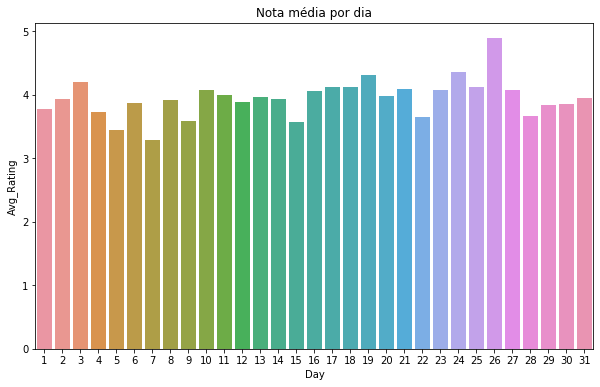

In [47]:
data = pd.DataFrame(df.groupby('Day_x')['rating'].mean().reset_index())

col = sns.color_palette()
plt.figure(figsize = (10,6))
sns.barplot(data = data, x = 'Day_x', y = 'rating')
plt.title('Nota média por dia')
plt.xlabel('Day')
plt.ylabel('Avg_Rating')
plt.show()

### Filmes com maiores notas médias

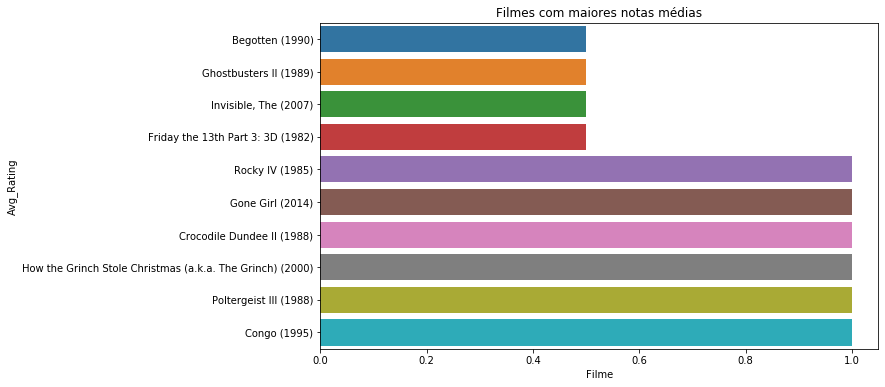

In [48]:
data = pd.DataFrame(df.groupby('title')['rating'].mean().reset_index().sort_values(by=['rating']).head(10))

col = sns.color_palette()
plt.figure(figsize = (10,6))
sns.barplot(data = data, y = 'title', x = 'rating')
plt.title('Filmes com maiores notas médias')
plt.xlabel('Filme')
plt.ylabel('Avg_Rating')
plt.show()

### Pivot table: Fazer usuários como linhas e filmes como colunas:

In [49]:
pivot_table = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)


title   (500) Days of Summer (2009)  ...And Justice for All (1979)  \
userId                                                               
2                               NaN                            NaN   
7                               NaN                            NaN   
18                              NaN                            NaN   
21                              NaN                            NaN   
49                              NaN                            NaN   
62                              NaN                            NaN   
63                              NaN                            NaN   
76                              NaN                            NaN   
103                             NaN                            NaN   
106                             NaN                            NaN   

title   10 Cloverfield Lane (2016)  10 Things I Hate About You (1999)  \
userId                                                                  
2                              NaN                                NaN   
7                              NaN                                NaN   
18                             NaN                                NaN   
21                             NaN                                NaN   
49                             NaN                                NaN   
62                             NaN                                NaN   
63                             NaN                                NaN   
76                             NaN                                NaN   
103                            NaN                                NaN   
106                            NaN                                NaN   

title   101 Dalmatians (1996)  \
userId                          
2                         NaN   
7                         NaN   
18                        NaN   
21                        NaN   
49                        NaN   
62                        NaN   
63                        NaN   
76                        NaN   
103                       NaN   
106                       NaN   

title   101 Dalmatians (One Hundred and One Dalmatians) (1961)  \
userId                                                           
2                                                     NaN        
7                                                     NaN        
18                                                    NaN        
21                                                    NaN        
49                                                    NaN        
62                                                    NaN        
63                                                    NaN        
76                                                    NaN        
103                                                   NaN        
106                                                   NaN        

title   11'09"01 - September 11 (2002)  12 Angry Men (1957)  \
userId                                                        
2                                  NaN                  NaN   
7                                  NaN                  NaN   
18                                 NaN                  NaN   
21                                 NaN                  NaN   
49                                 NaN                  NaN   
62                                 NaN                  NaN   
63                                 NaN                  NaN   
76                                 NaN                  NaN   
103                                NaN                  NaN   
106                                NaN                  NaN   

title   13 Going on 30 (2004)  2001: A Space Odyssey (1968)  ...  \
userId                                                       ...   
2                         NaN                           NaN  ...   
7                         NaN                           NaN  ...   
18                        NaN                           NaN  ..